In [1]:
# Import libraries and dataset

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Adjust pandas display options
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent truncation


df = pd.read_csv('/Users/joezhou/Downloads/Mentum Assignment Data/Customer-churn-records.csv',sep=",")



In [2]:
# Part 2 
# Calculate basic statistical measures such as mean, median, mode, and percentiles for each attribute. 

# identify variable types and records
df.info()

# basic statistics
df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


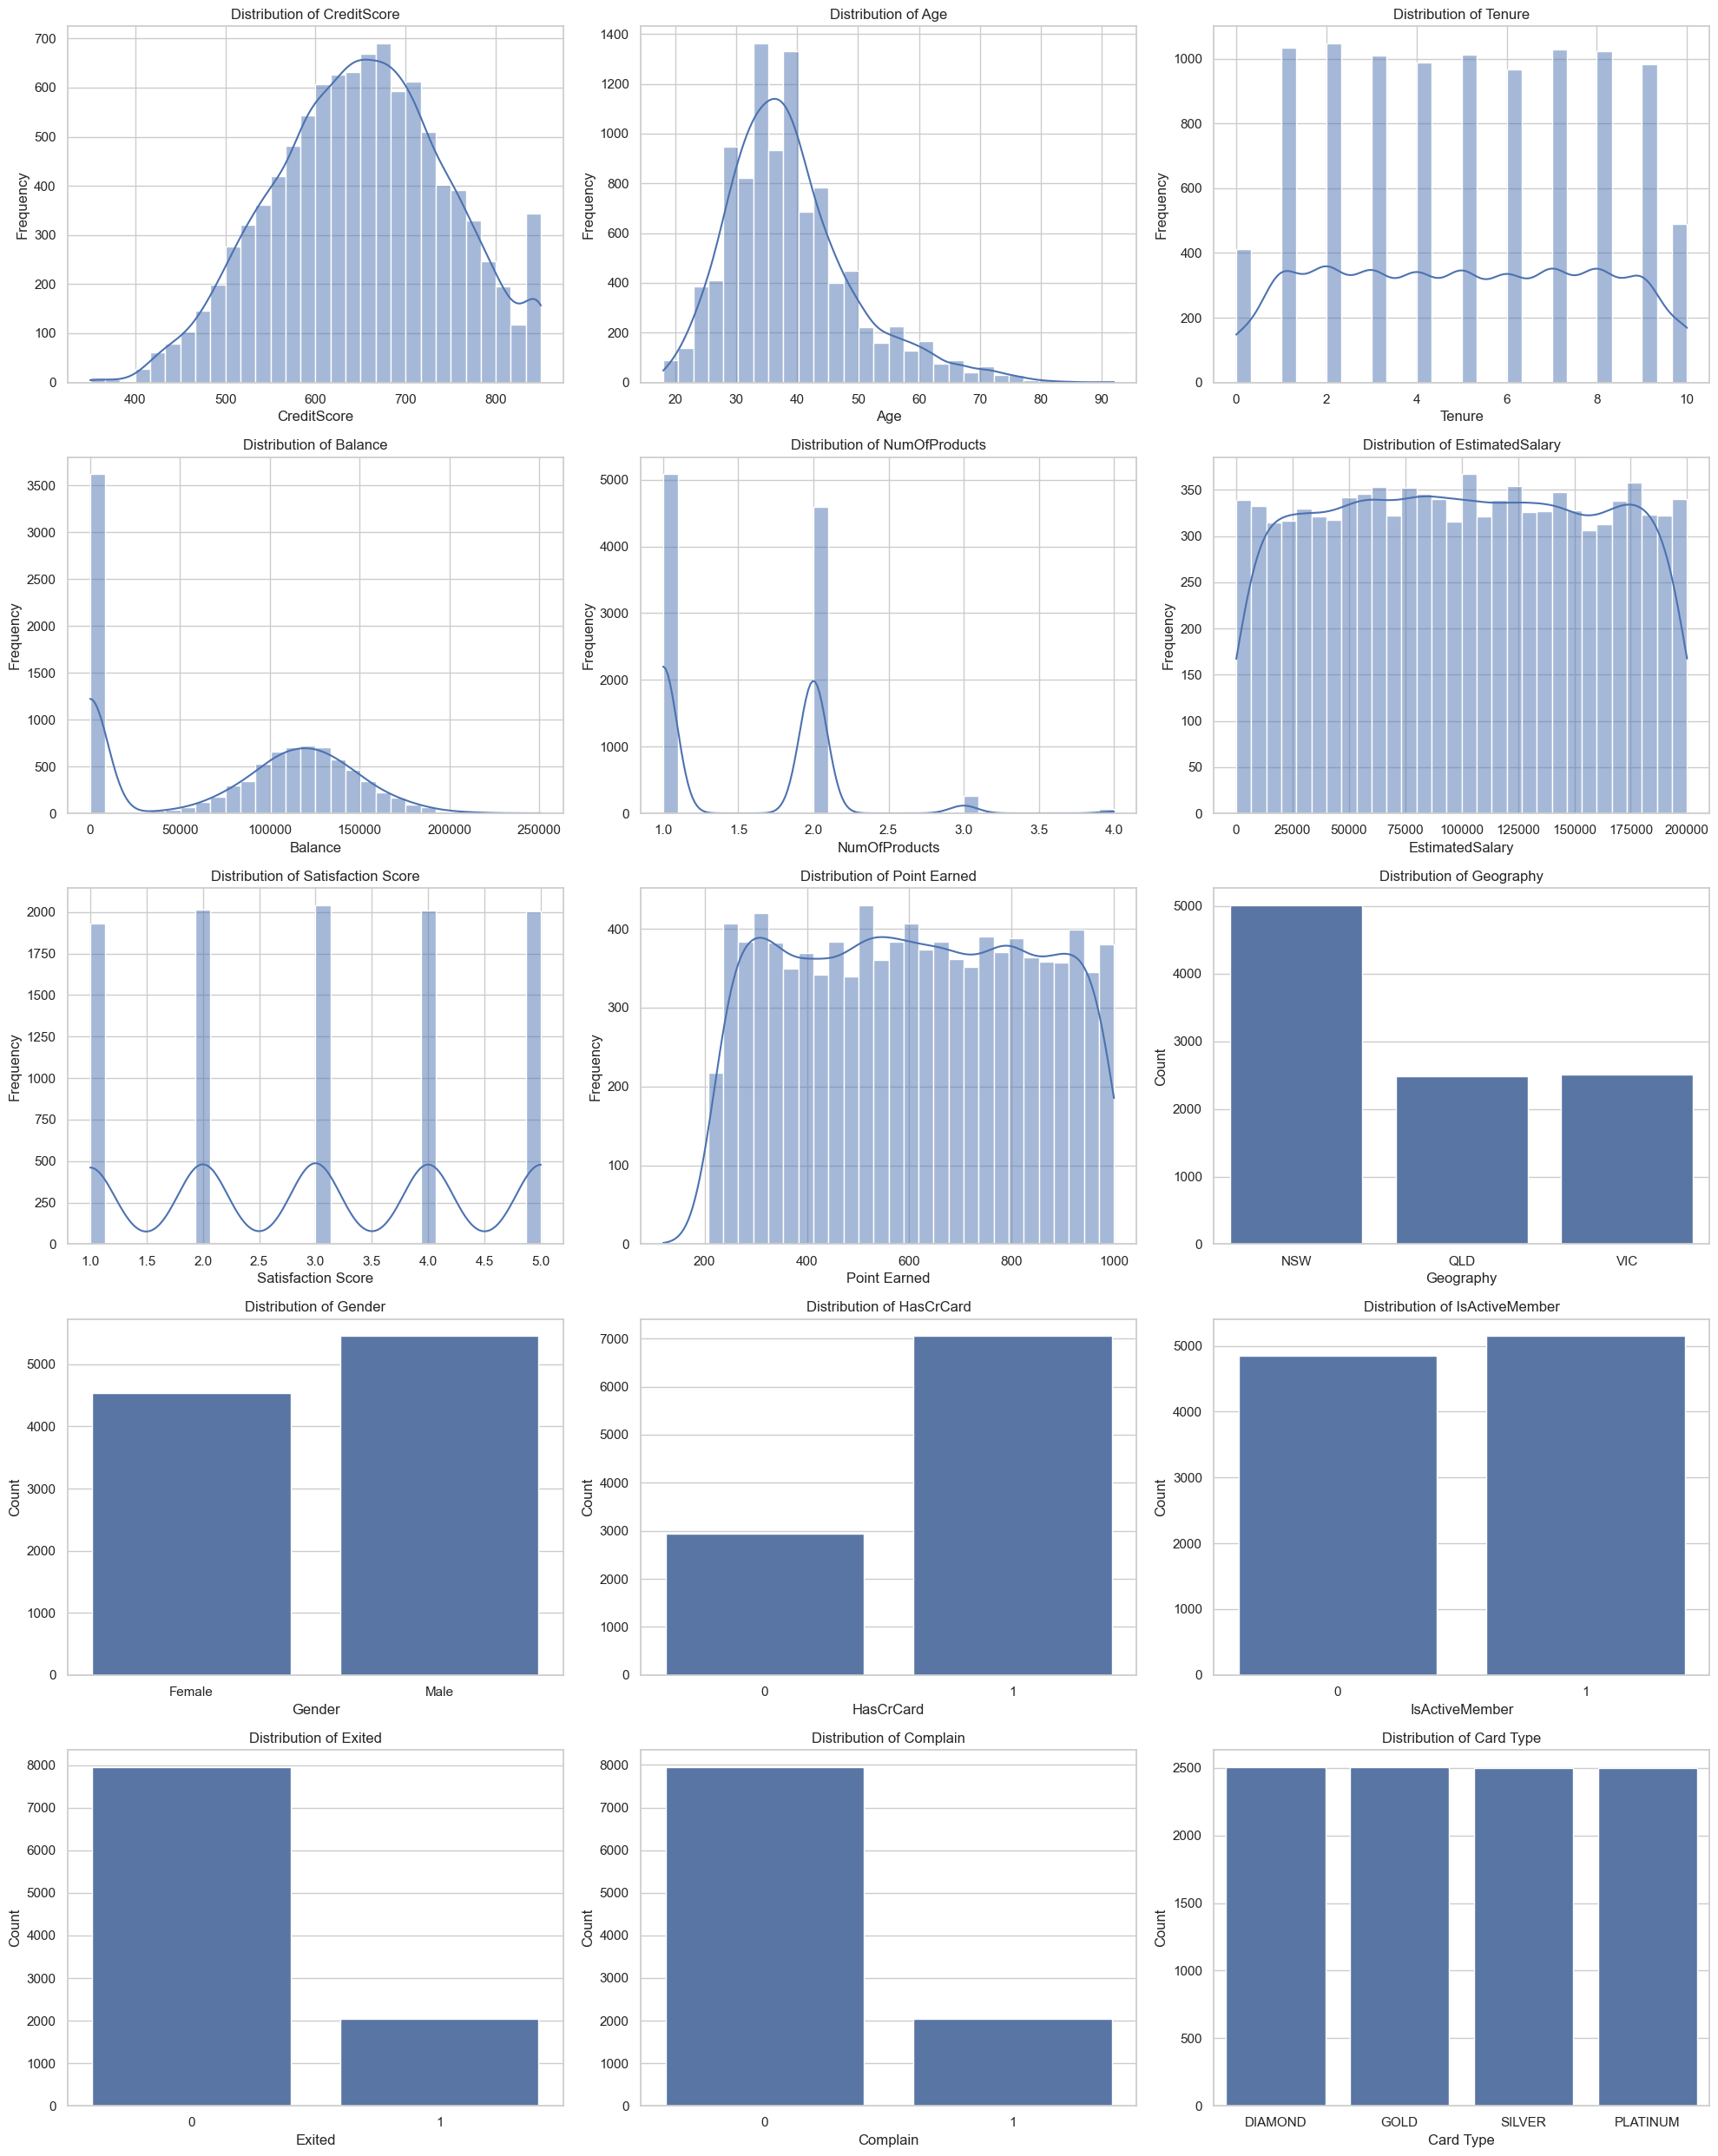

In [3]:

# distribution graphs
# List of numerical and categorical columns, as some are numerical whilest others are categorical
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
                     'EstimatedSalary', 'Satisfaction Score', 'Point Earned']

# identified as objects in the underlying data
categorical_columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited', 'Complain', 'Card Type']

# Combine the lists to get the total number of variables
all_columns = numerical_columns + categorical_columns
total_columns = len(all_columns)

# Determine grid size (e.g., 3 columns)
n_cols = 3
n_rows = (total_columns // n_cols) + (total_columns % n_cols > 0)

# Set up the plotting style and figure size
sns.set(style="whitegrid")
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Create plots for each variable
for i, col in enumerate(all_columns):
    if col in numerical_columns:
        sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    else:
        sns.countplot(x=col, data=df, ax=axes[i])
    
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency' if col in numerical_columns else 'Count')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


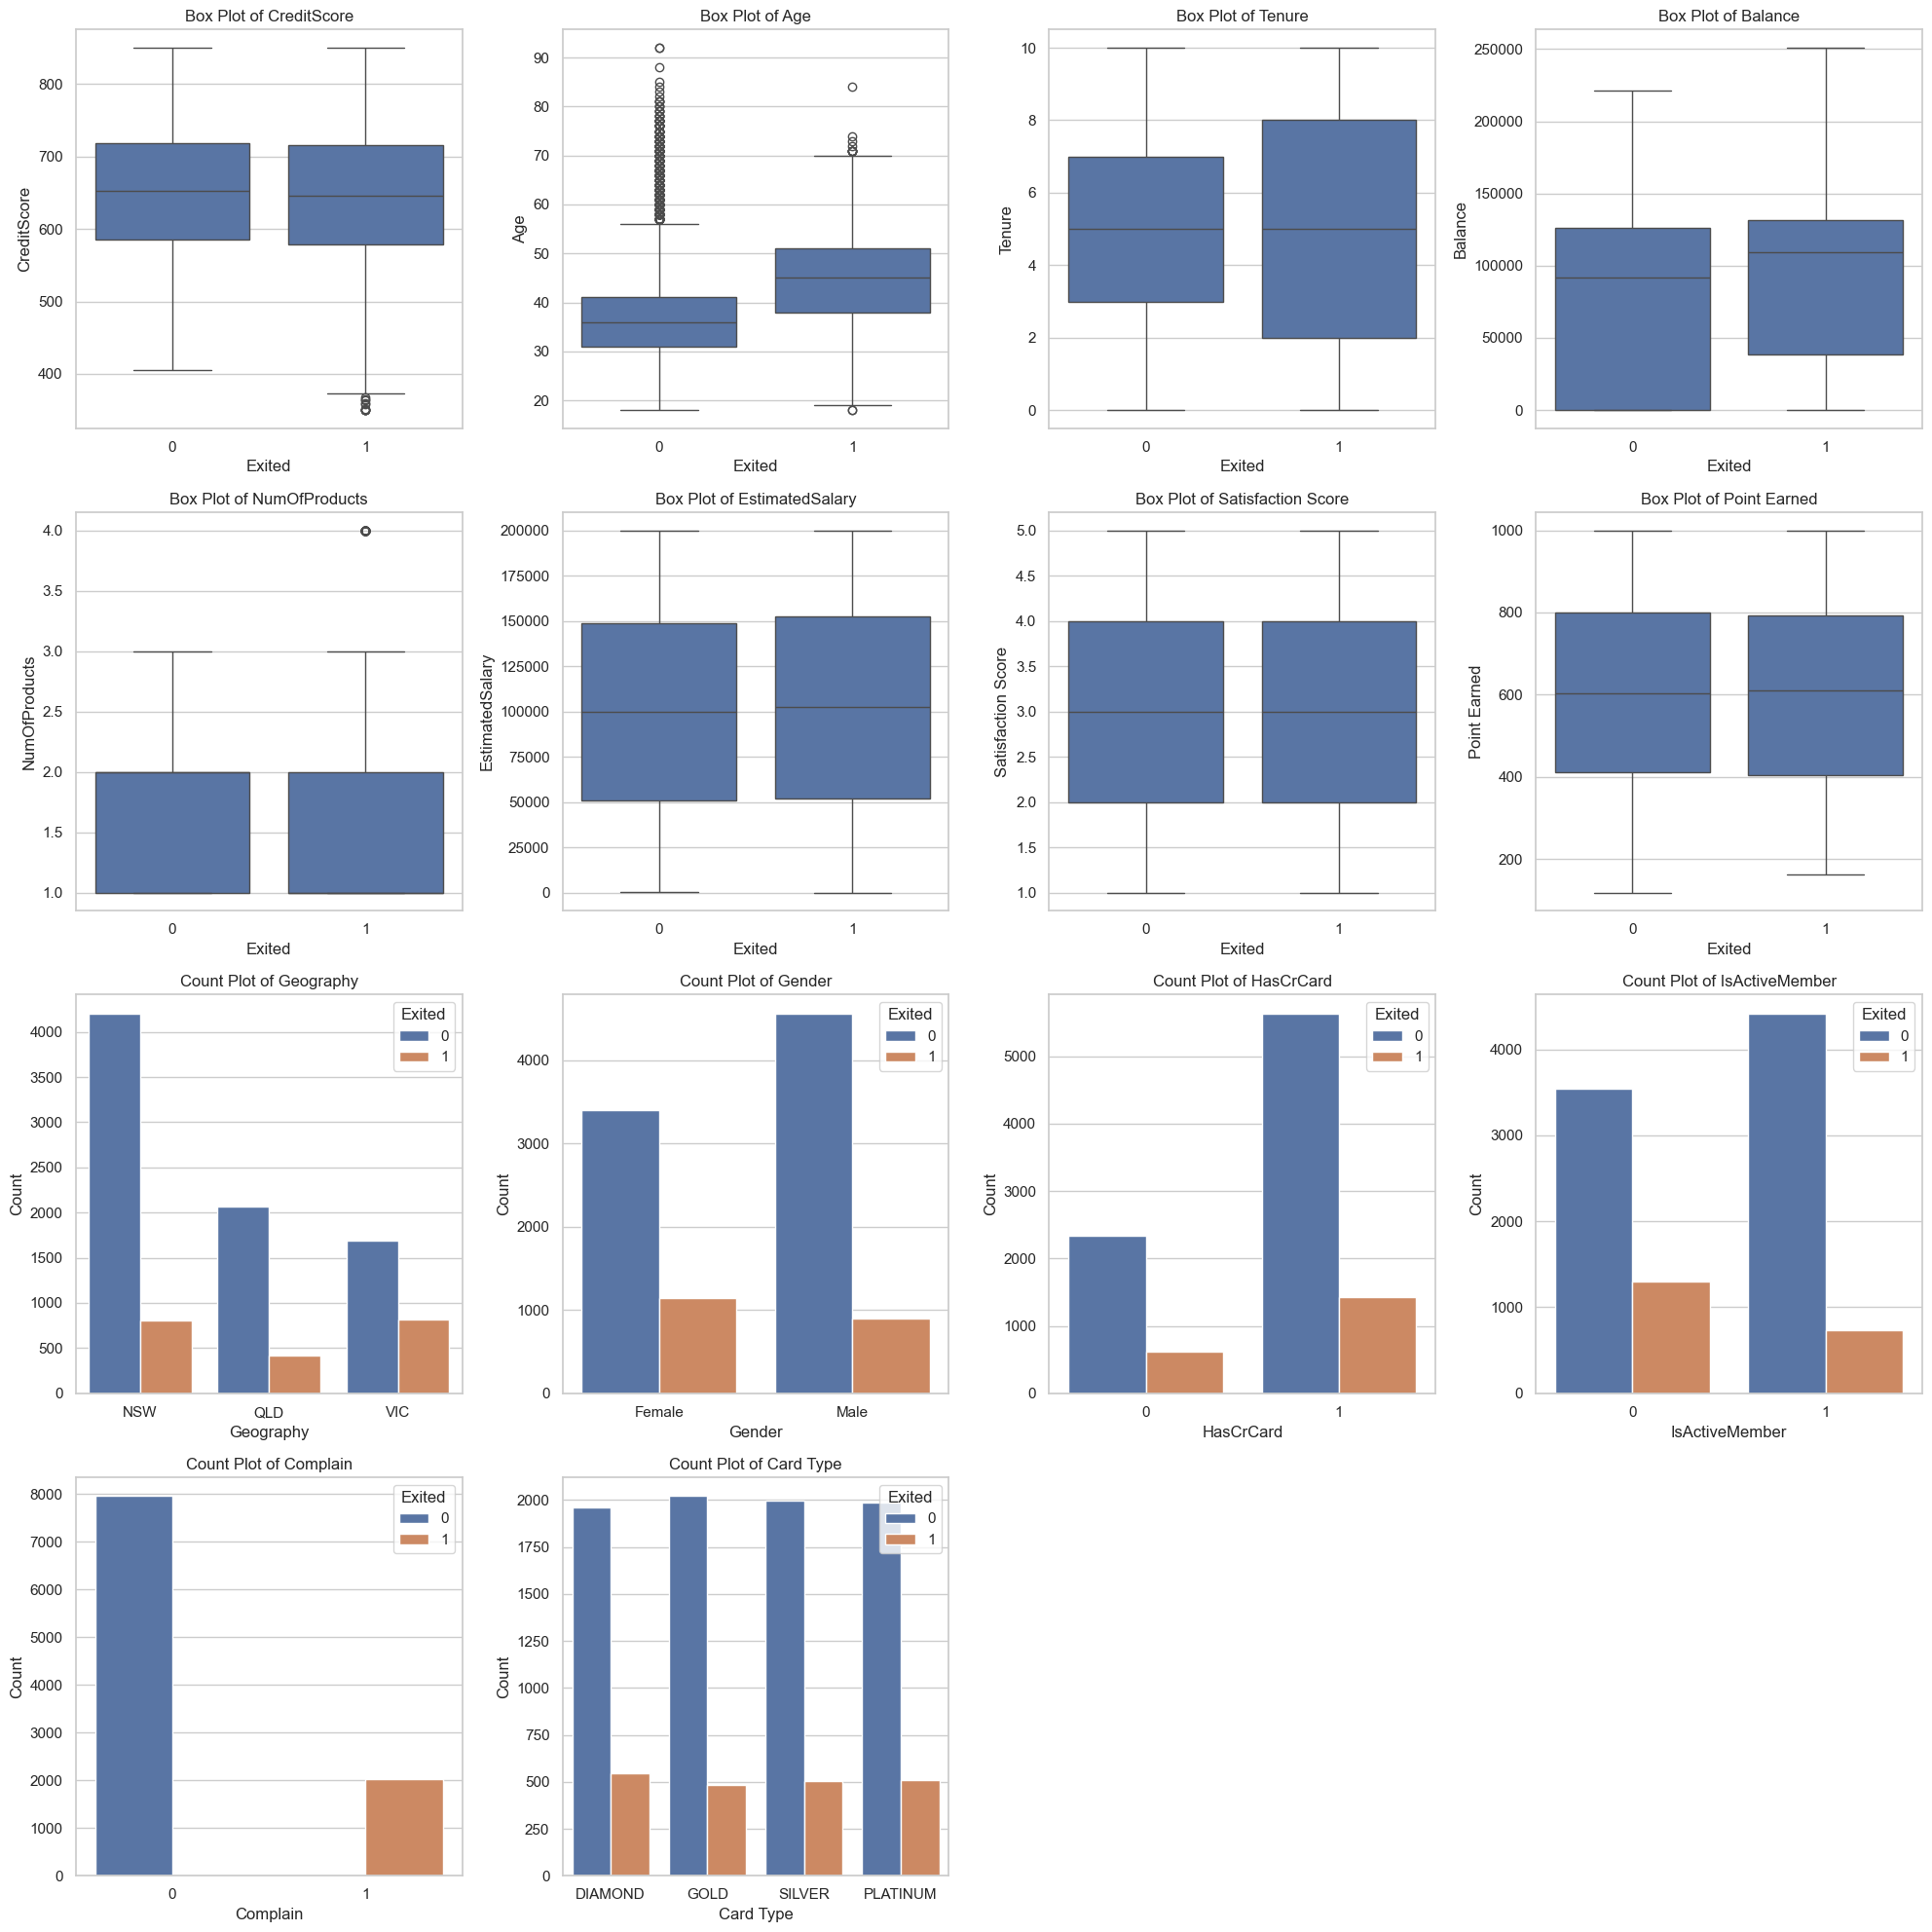

In [4]:
# List of numerical and categorical columns
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
                     'EstimatedSalary', 'Satisfaction Score', 'Point Earned']

categorical_columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 
                       'Complain', 'Card Type']

# Combine the lists to get the total number of variables
all_columns = numerical_columns + categorical_columns
total_columns = len(all_columns)

# Determine grid size (e.g., 4 columns)
n_cols = 4
n_rows = (total_columns // n_cols) + (total_columns % n_cols > 0)

# Set up the matplotlib figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Create plots for each variable
for i, col in enumerate(all_columns):
    if col in numerical_columns:
        sns.boxplot(x='Exited', y=col, data=df, ax=axes[i])
        axes[i].set_title(f'Box Plot of {col}')
        axes[i].set_xlabel('Exited')
        axes[i].set_ylabel(col)
    else:
        sns.countplot(x=col, hue='Exited', data=df, ax=axes[i])
        axes[i].set_title(f'Count Plot of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [5]:
# Convert categorical variables into numerical variables to understand relationship to churn for correlation analysis

df_encoded = pd.get_dummies(df, columns=['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Complain', 'Card Type'], drop_first=False)

# Identify and convert boolean columns to integers
bool_columns = df_encoded.select_dtypes(include='bool').columns

df_encoded[bool_columns] = df_encoded[bool_columns].astype(int)

# df_encoded.head()
# df_encoded.info()



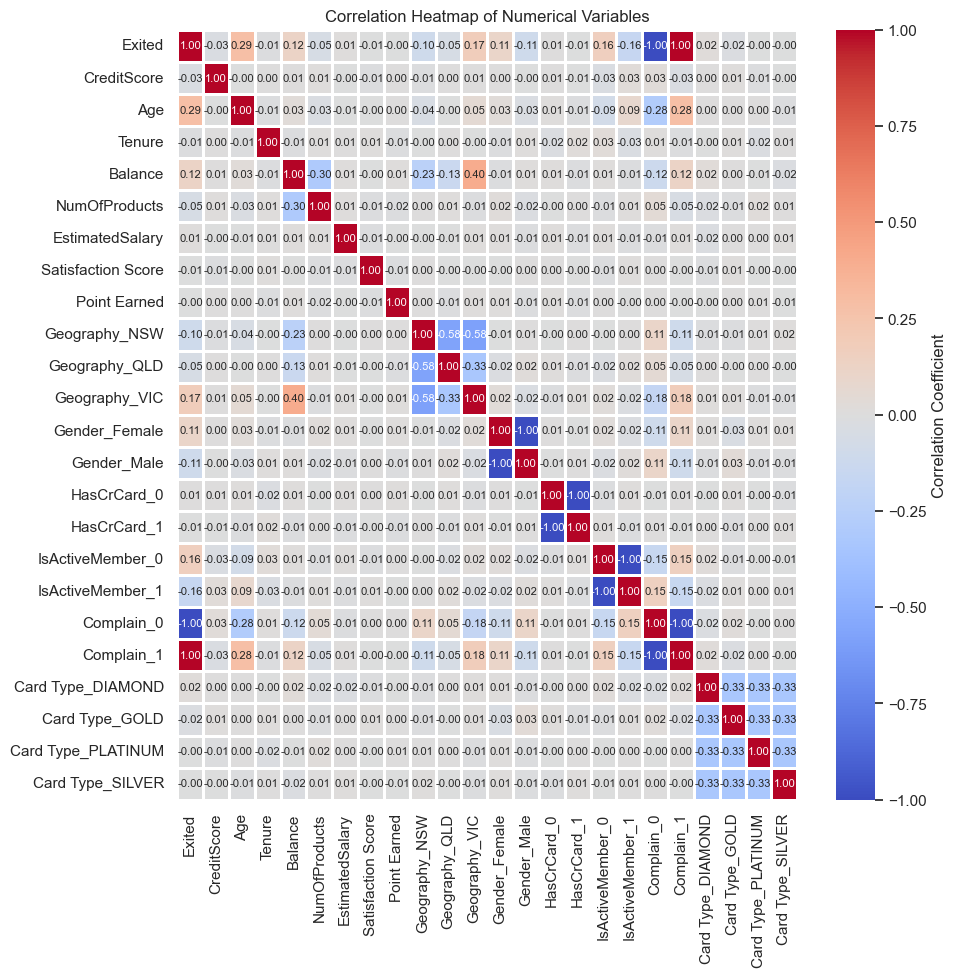

Variables: Gender_Male and Gender_Female have a correlation of -1.00 and R-squared of 1.00
Variables: HasCrCard_1 and HasCrCard_0 have a correlation of -1.00 and R-squared of 1.00
Variables: IsActiveMember_1 and IsActiveMember_0 have a correlation of -1.00 and R-squared of 1.00
Variables: Complain_0 and Exited have a correlation of -1.00 and R-squared of 0.99
Variables: Complain_1 and Exited have a correlation of 1.00 and R-squared of 0.99
Variables: Complain_1 and Complain_0 have a correlation of -1.00 and R-squared of 1.00


In [6]:
# Part 2: create heatmap and correlation chart 

# List of shortlisted columns
shortlist_columns = [#outcome variable used for prediction
                     'Exited',
                     #Numerical variables from source file
                     'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
                     'EstimatedSalary', 'Satisfaction Score','Point Earned',
                    #transformed variable from categories
                    'Geography_NSW', 'Geography_QLD', 'Geography_VIC','Gender_Female','Gender_Male',
                    'HasCrCard_0','HasCrCard_1','IsActiveMember_0','IsActiveMember_1','Complain_0','Complain_1',
                    'Card Type_DIAMOND', 'Card Type_GOLD','Card Type_PLATINUM','Card Type_SILVER'
                     ]


# Calculate the correlation matrix
correlation_matrix = df_encoded[shortlist_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 10))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f",annot_kws={"size": 8}, cmap='coolwarm',
            cbar_kws={'label': 'Correlation Coefficient'}, linewidths=2)

# Set title and show the plot
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()




# Find pairs with correlation coefficient >= 0.8
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= 0.8:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Display the pairs and their R-squared values
for pair in high_corr_pairs:
    var1, var2, corr = pair
    r_squared = corr ** 2
    print(f"Variables: {var1} and {var2} have a correlation of {corr:.2f} and R-squared of {r_squared:.2f}")



In [7]:
# Part 2
# Now that you have access to the dataset, it’s time to start understanding the statistical properties of the data. 
# These activities will all be carried out in Ed Lessons.
# Calculate basic statistical measures such as mean, median, mode, and percentiles for each attribute. 
# Recognise common distributions in the data, such as Gaussian, binomial, Poisson, etc. 
# Plan what visualisations you will include in your report and describe how you will explore and visualise the data.



In [15]:
# data quality checks
# identify, missing values, duplicates, data types, value range and unique values in categorical columns


# Check for duplicate rows
print(df[df.duplicated(subset=df.columns)])
 
# Check for duplicate primary keys
print(df[df.duplicated(subset='CustomerId')])

# note the function below common practice used within professional context

def check_data_quality(df):

    # Check for missing values
    print("Missing Values:")
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    if not missing_values.empty:
        print(missing_values)
    else:
        print("No missing values found.")
    
    print("\n")
    
    # Check for duplicates
    print("Duplicate Rows:")
    duplicates = df.duplicated().sum()
    if duplicates > 0:
        print(f"Number of duplicate rows: {duplicates}")
    else:
        print("No duplicate rows found.")
    
    print("\n")
    
    # Check for incorrect data types
    print("Data Types:")
    incorrect_types = df.dtypes[df.dtypes == 'object'].index
    print(f"Object types: {list(incorrect_types)}")
    
    # Check for value ranges and outliers (for numerical columns)
    print("\nValue Ranges and Outliers:")
    for column in df.select_dtypes(include=['int64', 'float64']).columns:
        min_val = df[column].min()
        max_val = df[column].max()
        print(f"{column}: Min = {min_val}, Max = {max_val}")
        
        # Outliers can be detected using z-scores or IQR, here we use IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
        if not outliers.empty:
            print(f"Outliers detected in {column}: {len(outliers)} rows")
        else:
            print(f"No outliers detected in {column}")

    print("\n")
    
    # Check for unique values in categorical columns
    print("Unique Values in Categorical Columns:")
    for column in df.select_dtypes(include=['object']).columns:
        unique_values = df[column].unique()
        print(f"{column}: {len(unique_values)} unique values")

# Call function
check_data_quality(df)




Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited, Complain, Satisfaction Score, Card Type, Point Earned]
Index: []
Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited, Complain, Satisfaction Score, Card Type, Point Earned]
Index: []
Missing Values:
No missing values found.


Duplicate Rows:
No duplicate rows found.


Data Types:
Object types: ['Surname', 'Geography', 'Gender', 'Card Type']

Value Ranges and Outliers:
RowNumber: Min = 1, Max = 10000
No outliers detected in RowNumber
CustomerId: Min = 15565701, Max = 15815690
No outliers detected in CustomerId
CreditScore: Min = 350, Max = 850
Outliers detected in CreditScore: 15 rows
Age: Min = 18, Max = 92
Outliers detected in Age: 359 rows
Tenure: Min = 0, Max = 10
No outliers detecte

In [14]:
# boot strapping

import numpy as np
from sklearn.utils import resample
from scipy.stats import sem, t, norm

# Bootstrapping
# Bootstrapping is a resampling technique used to estimate statistics on a population by sampling a dataset with replacement.
# This allows us to assess the variability of our sample statistics and build confidence intervals.
# We can use the `resample()` method from `sklearn`
bootstrap_sample = resample(df, replace=True, n_samples=1000)
print("\nbootstrap_sample Dimensions:")
print(f"Row count:{bootstrap_sample.shape[0]}")
print(f"Attribute count:{bootstrap_sample.shape[1]}")
print(" ")
#To print a small sample of the DataFrame data, we can use the `head()` method.
print("\nbootstrap_sample Data:")
display(bootstrap_sample.head())



ModuleNotFoundError: No module named 'sklearn'

In [8]:
# Part 3
# Generating relevant charts to visualise the distributions of different attributes will be your starting point for this part. 
# Generate histograms, box plots and other relevant charts to visualise data distributions
# Generate a correlation matrix to understand the relationships between different attributes. 
# Identify and address any data quality issues in the dataset. 


# NEED TO DO THIS: Select a random sample from the dataset and apply bootstrapping techniques.


In [9]:
# Part 4
# For this final part, formulate hypotheses related to customer churn. For example, ‘customers with a lower balance are more likely to churn.’ 
# Apply statistical significance tests to evaluate these hypotheses, interpret the results of your statistical tests and draw valid conclusions. This will help you gain an understanding of the principles of experimental design.
# Create a plan for a controlled experiment to test one of your hypotheses. Include the experiment design in your PowerPoint report.
# Write a conclusion for your report and include it in the PowerPoint.





/var/folders/0h/0f26ts797zn_y1qfqv62wxg40000gn/T/ipykernel_10801/1332462842.py:11: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  anova_results = stats.f_oneway(df_grouped.get_group('NSW')['Exited'],
/var/folders/0h/0f26ts797zn_y1qfqv62wxg40000gn/T/ipykernel_10801/1332462842.py:12: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  df_grouped.get_group('QLD')['Exited'],
/var/folders/0h/0f26ts797zn_y1qfqv62wxg40000gn/T/ipykernel_10801/1332462842.py:13: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  df_grouped.get_group('VIC')['Exited'])


F Statistic :  154.9255785113784
P-value :  5.4742314182697614e-67
We reject the null hypothesis and accept the alternative hypothesis.


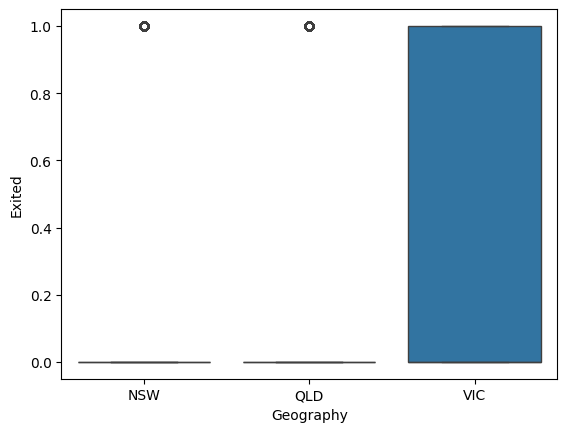

In [8]:
# part 4: use anova to test for categorical variables
# pip install scipy
import scipy.stats as stats


# First, we group the data based on 'Geography'
df_grouped = df[['Geography', 'Exited']].groupby(['Geography'])

df_grouped.head()


anova_results = stats.f_oneway(df_grouped.get_group('NSW')['Exited'], 
                               df_grouped.get_group('QLD')['Exited'], 
                               df_grouped.get_group('VIC')['Exited'])



# Interpreting Results
print('F Statistic : ', anova_results.statistic)
print('P-value : ', anova_results.pvalue)

# If the p-value is less than 0.05, we reject the null hypothesis
alpha = 0.05
p_val = anova_results.pvalue
if p_val < alpha:
    print("We reject the null hypothesis and accept the alternative hypothesis.")
else:
    print("We fail to reject the null hypothesis.")


sns.boxplot(x='Geography', y='Exited', data=df)
plt.show()




In [10]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report, roc_auc_score
# from scipy.stats import chi2_contingency, ttest_ind

# # Assuming df is your DataFrame

# # EDA
# print(df.describe())
# print(df['Exited'].value_counts())

# # Visualization
# sns.countplot(data=df, x='Exited', hue='Geography')
# sns.boxplot(data=df, x='Exited', y='CreditScore')
# plt.show()

# # Encoding categorical variables
# label_encoder = LabelEncoder()
# df['Gender'] = label_encoder.fit_transform(df['Gender'])
# df['Geography'] = label_encoder.fit_transform(df['Geography'])
# df['Card Type'] = label_encoder.fit_transform(df['Card Type'])

# # Correlation analysis
# correlation = df.corr()['Exited'].sort_values()
# print(correlation)

# # Statistical tests
# # Chi-Square Test for categorical variables
# contingency_table = pd.crosstab(df['Geography'], df['Exited'])
# chi2, p, _, _ = chi2_contingency(contingency_table)
# print(f'Chi-Square Test p-value for Geography: {p}')

# # T-Test for numerical variables
# exited = df[df['Exited'] == 1]
# not_exited = df[df['Exited'] == 0]
# t_stat, p_value = ttest_ind(exited['CreditScore'], not_exited['CreditScore'])
# print(f'T-Test p-value for CreditScore: {p_value}')

# # Model Building
# X = df.drop(['Exited', 'CustomerID', 'surname'], axis=1)
# y = df['Exited']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# model = LogisticRegression()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

# print(classification_report(y_test, y_pred))
# print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred)}')
